# Eric Karsten PSET  Solutions

## 1. Stochastic i.i.d. cake eating problem

Assume a cake eating problem in which cake size in the current period is $W$, cake size next period is $W'$, current period consumption is the difference in the cake size $C = W − W'$, and the utility of consumption is a monotonically increasing concave function $u(c)$. Also assume that the individuals preferences fluctuate each period according to some i.i.d. shock $\varepsilon$.

In [1]:
import numpy as np
import scipy.optimize as opt
import scipy.interpolate as intpl
import matplotlib.pyplot as plt

# Parameter Setup
W_vec = np.linspace(0.1, 10, 30)
W_size = W_vec.shape[0]

eps_vec = np.array([-1.40, -0.55, 0.0, 0.55, 1.4])
eps_prob = np.array([0.1, 0.2, 0.4, 0.2, 0.1])
eps_size = eps_vec.shape[0]

VF_maxiter = 500
VF_mindist = 1e-8

beta = 0.9
gamma = 2.2

### (a)

Assume that $\beta = 0.9$ and $\gamma = 2.2$. Use value function iteration with interpolation over the expected value of the value function next period to solve for the equilibrium solution value function $V (W, \varepsilon)$ and policy function $W' = \psi(W, \varepsilon)$ that solve the Bellman equation (1). For your grid, use 30 equally spaced points of cake size $W$ between $0.1$ and $10.0$, and use the five points in the ε dimension listed above.

In [2]:
def util_CRRA(W, W_pr, gamma):
    return ((W - W_pr) ** (1 - gamma) - 1) / (1 - gamma)


def neg_V_iid(W_pr, *args):
    W, eps, util, Exp_V_t_interp, gamma, beta = args
    Vtp1 = np.exp(eps) * util(W, W_pr, gamma) + beta * Exp_V_t_interp(W_pr)
    neg_Vtp1 = -Vtp1
    return neg_Vtp1


VF_iter = 0
VF_dist = 10
V_new = np.zeros((W_size, eps_size))

while (VF_iter < VF_maxiter) and (VF_dist > VF_mindist):
    VF_iter += 1
    V_init = V_new.copy()
    V_new = np.zeros((W_size, eps_size))
    psi_mat = np.zeros((W_size, eps_size))
    
    # Integrate out eps_pr from V_init
    Exp_V = V_init @ eps_prob.reshape((eps_size, 1))
    
    # Interpolate expected value function
    Exp_V_interp = intpl.interp1d(W_vec, Exp_V.flatten(), kind='cubic',
                                   fill_value='extrapolate')

    for eps_ind in range(eps_size):
        for W_ind in range(W_size):
            W = W_vec[W_ind]
            eps = eps_vec[eps_ind]
            V_args = (W, eps, util_CRRA, Exp_V_interp, gamma, beta)
            results1 = opt.minimize_scalar(neg_V_iid, bounds=(1e-10, W - 1e-10),
                                           args=V_args, method='bounded')
            V_new[W_ind, eps_ind] = -results1.fun
            psi_mat[W_ind, eps_ind] = results1.x
    
    VF_dist = ((V_init - V_new) ** 2).sum()
    
V_1 = V_new.copy()
psi_1 = psi_mat.copy()

### (b) Plot Value Function
Display a plot of your equilibrium value function as five line plots $V (W, \varepsilon_j)$,
one for each value of $\varepsilon_j$ for $j = 1, 2, \dots, 5$ with the value function $V(W, \varepsilon)$ on the y-axis and with cake size $W$ on the x-axis. Make sure to include a
legend to show which line belongs to which preference shock.

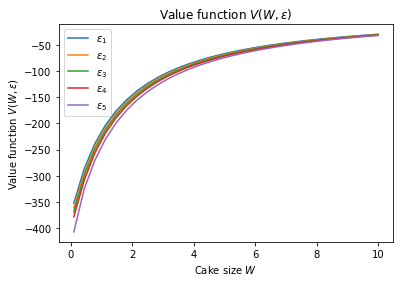

In [3]:
plt.plot(W_vec, V_1[:, 0], label='$\epsilon_1$')
plt.plot(W_vec, V_1[:, 1], label='$\epsilon_2$')
plt.plot(W_vec, V_1[:, 2], label='$\epsilon_3$')
plt.plot(W_vec, V_1[:, 3], label='$\epsilon_4$')
plt.plot(W_vec, V_1[:, 4], label='$\epsilon_5$')
plt.title('Value function $V(W,\epsilon)$');
plt.xlabel('Cake size $W$');
plt.ylabel('Value function $V(W,\epsilon)$');
plt.legend();

### (c) Plot Policy Function
Display a plot of your equilibrium value function as five line plots $\psi(W, \varepsilon_j)$,
one for each value of $\varepsilon_j$ for $j = 1, 2, \dots, 5$ with the policy function $\psi(W, \varepsilon)$ on the y-axis and with cake size $W$ on the x-axis. Make sure to include a
legend to show which line belongs to which preference shock.

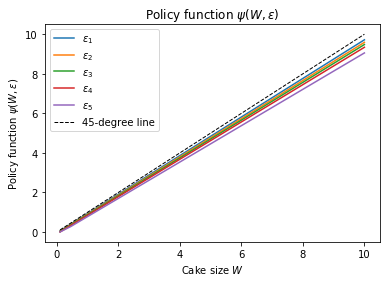

In [4]:
plt.plot(W_vec, psi_1[:, 0], label='$\epsilon_1$')
plt.plot(W_vec, psi_1[:, 1], label='$\epsilon_2$')
plt.plot(W_vec, psi_1[:, 2], label='$\epsilon_3$')
plt.plot(W_vec, psi_1[:, 3], label='$\epsilon_4$')
plt.plot(W_vec, psi_1[:, 4], label='$\epsilon_5$')
plt.plot(W_vec, W_vec, color='black', linewidth=1, linestyle='--',
         label='45-degree line')
plt.title('Policy function $\psi(W,\epsilon)$');
plt.xlabel('Cake size $W$');
plt.ylabel('Policy function $\psi(W,\epsilon)$');
plt.legend();

## Persistent AR(1) stochastic cake eating problem
Assume a cake eating problem similar to the one in Section 6 of the dynamic programming
introduction from last term in which cake size in the current period is $W$, cake size next period is $W'$, current period consumption is the difference in the cake size, and the utility of consumption is a monotonically increasing concave function $u(c)$. Also assume that the individuals preferences fluctuate each period according to some persistent AR(1) shock $\varepsilon$.

### (a)

Assume that $\beta = 0.9$ and $\gamma = 2.2$. Use value function iteration with interpolation over the expected value of the value function next period to solve for the equilibrium solution value function $V (W, \varepsilon)$ and policy function $W' = \psi(W, \varepsilon)$ that solve the Bellman equation (2). For your grid, use 30 equally spaced points of cake size $W$ between $0.1$ and $10.0$, and use the five points in the $\varepsilon$ dimension listed above and the transition matrix listed in the problem set.

In [5]:
trans_mat = np.array([[0.40, 0.28, 0.18, 0.10, 0.04],
                      [0.20, 0.40, 0.20, 0.13, 0.07],
                      [0.10, 0.20, 0.40, 0.20, 0.10],
                      [0.07, 0.13, 0.20, 0.40, 0.20],
                      [0.04, 0.10, 0.18, 0.28, 0.40]])

VF_iter = 0
VF_dist = 10
V_new = np.zeros((W_size, eps_size))

while (VF_iter < VF_maxiter) and (VF_dist > VF_mindist):
    VF_iter += 1
    V_init = V_new.copy()
    V_new = np.zeros((W_size, eps_size))
    psi_mat = np.zeros((W_size, eps_size))

    for eps_ind in range(eps_size):
        # Calculate expected value, integrate out epsilon prime
        trans_mat_ind = trans_mat[eps_ind, :]
        Exp_V = V_init @ trans_mat_ind.reshape((eps_size, 1))
        
        # Interpolate expected value function
        Exp_V_interp = intpl.interp1d(W_vec, Exp_V.flatten(), kind='cubic',
                                      fill_value='extrapolate')
        for W_ind in range(W_size):
            W = W_vec[W_ind]
            eps = eps_vec[eps_ind]
            V_args = (W, eps, util_CRRA, Exp_V_interp, gamma, beta)
            results1 = opt.minimize_scalar(neg_V_iid, bounds=(1e-10, W - 1e-10),
                                           args=V_args, method='bounded')
            V_new[W_ind, eps_ind] = -results1.fun
            psi_mat[W_ind, eps_ind] = results1.x
    
    VF_dist = ((V_init - V_new) ** 2).sum()
    
V_2 = V_new.copy()
psi_2 = psi_mat.copy()

### (b) Plot Value Function
Display a plot of your equilibrium value function as five line plots $V (W, \varepsilon_j)$,
one for each value of $\varepsilon_j$ for $j = 1, 2, \dots, 5$ with the value function $V(W, \varepsilon)$ on the y-axis and with cake size $W$ on the x-axis. Make sure to include a
legend to show which line belongs to which preference shock.

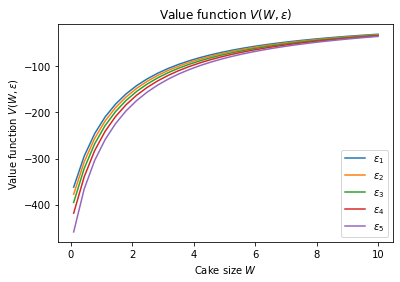

In [6]:
plt.plot(W_vec, V_2[:, 0], label='$\epsilon_1$')
plt.plot(W_vec, V_2[:, 1], label='$\epsilon_2$')
plt.plot(W_vec, V_2[:, 2], label='$\epsilon_3$')
plt.plot(W_vec, V_2[:, 3], label='$\epsilon_4$')
plt.plot(W_vec, V_2[:, 4], label='$\epsilon_5$')
plt.title('Value function $V(W,\epsilon)$');
plt.xlabel('Cake size $W$');
plt.ylabel('Value function $V(W,\epsilon)$');
plt.legend();

### (c) Plot Policy Function
Display a plot of your equilibrium value function as five line plots $\psi(W, \varepsilon_j)$,
one for each value of $\varepsilon_j$ for $j = 1, 2, \dots, 5$ with the policy function $\psi(W, \varepsilon)$ on the y-axis and with cake size $W$ on the x-axis. Make sure to include a
legend to show which line belongs to which preference shock.

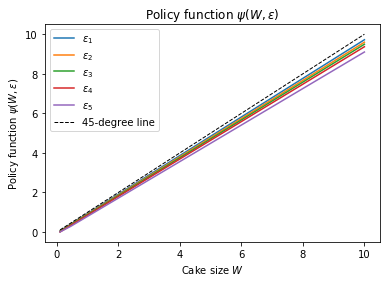

In [7]:
plt.plot(W_vec, psi_2[:, 0], label='$\epsilon_1$')
plt.plot(W_vec, psi_2[:, 1], label='$\epsilon_2$')
plt.plot(W_vec, psi_2[:, 2], label='$\epsilon_3$')
plt.plot(W_vec, psi_2[:, 3], label='$\epsilon_4$')
plt.plot(W_vec, psi_2[:, 4], label='$\epsilon_5$')
plt.plot(W_vec, W_vec, color='black', linewidth=1, linestyle='--',
         label='45-degree line')
plt.title('Policy function $\psi(W,\epsilon)$');
plt.xlabel('Cake size $W$');
plt.ylabel('Policy function $\psi(W,\epsilon)$');
plt.legend();